In [4]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.fft import rfftn, fftfreq, rfftfreq

In [5]:
#box size in Mpc
L=352 #preso dal sito e dipende dalla simulazione
volume=L**3

#create the particles
x,y,z = np.genfromtxt('cluster.txt', usecols=(1,2,3), unpack=True)/1000

#number of points
n_points=len(x)
density=n_points/volume

In [6]:
#create the density in the grid
n_cells = 64
cell_side=L/n_cells

#compute the mean density in the cell
cell_mean_density = n_points/n_cells**3

#create the grid with his histogramm
grid, edges=np.histogramdd((x, y, z), bins=(n_cells,n_cells,n_cells), range=((0,L),(0,L),(0,L)))
density_field=(grid-cell_mean_density)/cell_mean_density

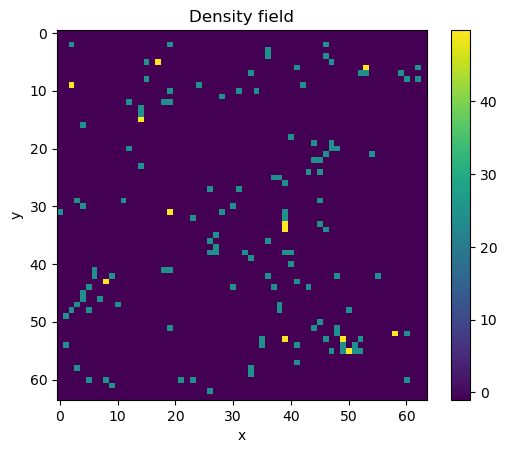

In [7]:
cb=plt.imshow(density_field[:,:,0], )
plt.colorbar(cb)
plt.title("Density field")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [8]:
#compute the delta in fourier space
delta_k = rfftn(density_field)/n_cells**3


In [9]:
#create the k grid
kF=2*np.pi/L
H=L/n_cells
kN=np.pi/H
kx=fftfreq(n_cells, d=1/n_cells)*kF
ky=fftfreq(n_cells, d=1/n_cells)*kF
kz=rfftfreq(n_cells, d=1/n_cells)*kF


In [10]:
KX, KY, KZ = np.meshgrid(kx, ky, kz)
KK=np.sqrt(KX**2 + KY**2 + KZ**2)

In [11]:
pk_grid=delta_k*np.conjugate(delta_k)*volume

In [12]:
#Binning
c=1
k_edges=np.arange(kF,kN,c*kF)
k_bins=0.5*(k_edges[1:]+k_edges[:-1])


/Users/pietromongiardini/anaconda3/envs/acc-env/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/pietromongiardini/anaconda3/envs/acc-env/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


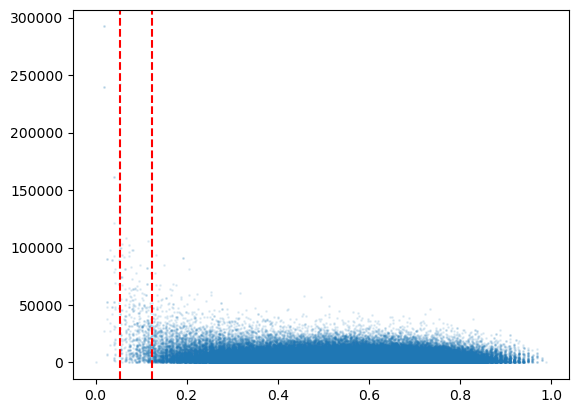

In [13]:
plt.plot(KK.flatten(), pk_grid.flatten(), 'o', markersize=1, alpha=0.1)
plt.axvline(k_edges[2], color='r', linestyle='--', label='k bins')
plt.axvline(k_edges[6], color='r', linestyle='--', label='k bins')

In [14]:
pk_average=np.zeros(k_bins.shape)
k_average=np.zeros(k_bins.shape)

for i in range(len(k_bins)):
    mask=(KK.flatten() > k_edges[i]) & (KK.flatten() < k_edges[i+1])
    pk_average[i]=np.mean(pk_grid.flatten()[mask].real)
    k_average[i]=np.mean(KK.flatten()[mask])
    print(k_average[i], pk_average[i])

0.027134780244354898 46691.7879449532
0.04353326238618051 44664.6457536939
0.06114480765881242 34155.93145135907
0.07906024245115863 27485.452175045004
0.09820418179710244 18382.458010954793
0.11562184524758501 17294.085765821575
0.13336692718796436 13545.813225909034
0.15082161411098557 10549.469329906638
0.16961678757518764 10281.02914903574
0.18710531779182044 9476.568967802128
0.204783179803721 8279.540507929258
0.22240525062611463 7818.257057185956
0.24101836600259835 7129.701049509577
0.2587009184407701 7032.696655920056
0.2765644030168224 6813.650028702422
0.2939369832054017 6098.4461611825955
0.31199836818298426 6188.560710157864
0.3299310333587378 5858.983557212285
0.3478379663107546 5316.596482259929
0.3656843131135587 5162.990619516961
0.3837478590732137 5232.506328380352
0.4012110820726777 5064.493448477301
0.4192270590865325 4976.198819378129
0.4369046055630204 4977.980816774946
0.45489269456418036 4797.641616290683
0.472906386100434 4618.18146445053
0.49097383851630505 47

Text(0, 0.5, 'pk [Mpc**3/h**3]')

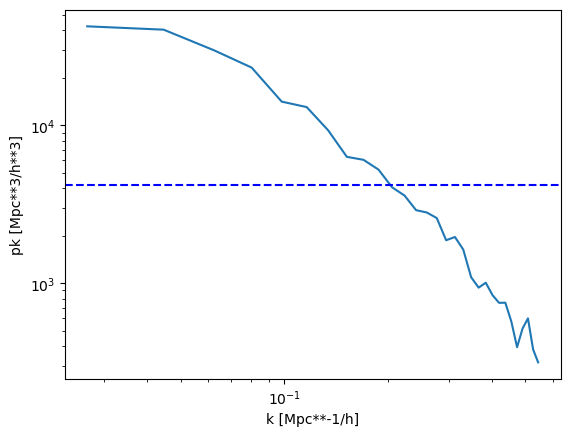

In [15]:
plt.loglog(k_bins, pk_average-1./density, '-', markersize=5, label='pk average')
plt.axhline(1./density, color='b', linestyle='--', label='k bins')
plt.xlabel("k [Mpc**-1/h]")
plt.ylabel("pk [Mpc**3/h**3]")